# Seeded Poisson Factorization (SPF) example notebook

This notebook is a minimal example of the SPF model.

In [1]:
# Imports
from SPF.SPF_model import SPF
import numpy as np
import pandas as pd

df1 = pd.read_csv("./data/10k_amazon.csv")
df1.head()

c:\Users\Bernd\Documents\01_Coding\02_GitHub\Seeded-Poisson-Factorization


,Unnamed: 0,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3,tokens
0,15123,B00032G1S0,"Tuscan Whole Milk, 1 Gallon, 128 fl oz",A3B4TGHT06VIV9,19/20,5.0,1220659200,"It is a Tuscan Milkman,And he stoppeth only me...",grocery gourmet food,dairy eggs,milk,106
1,29859,B000O1LEK0,Kid Galaxy Mega X Morphibian Komodo dragon,A29BL1ME0A4S0U,1/1,4.0,1306800000,This is a fun car. The only problem is the sho...,toys games,electronics for kids,unknown,52
2,25129,B000G7WU50,Boon Flo Water Deflector and Protective Faucet...,A1M2CJJ859SZV7,1/1,2.0,1285372800,This does indeed deflect the water for a softe...,baby products,safety,bathroom safety,284
3,20101,B000K50KVO,Playtex Baby Einstein 6oz. Spill-Proof Trainer...,A1YU39HHJTF0F0,0/0,1.0,1254700800,because my little girl loves to chew on her si...,baby products,feeding,solid feeding,46
4,18841,B0001E8BJ2,Pre~Seed Intimate Moisturizer with 2 Early Pre...,A17YQZH6BBY9O4,2/2,5.0,1244851200,We got pregnant after using this product only ...,health personal care,health care,family planning contraceptives,49


In [2]:
# Define keywords
pets = ["dog","cat", "litter", "cats", "dogs", "food", "box", "collar", "water", "pet"]
toys = ["toy", "game", "play", "fun", "old", "son", "year", "loves", "kids", "daughter"]
beauty = ["hair", "skin", "product", "color", "scent", "smell", "used", "dry", "using", "products"]
baby = ["baby", "seat", "diaper", "diapers", "stroller", "bottles", "son", "pump", "gate", "months"]
health = ["product", "like", "razor", "shave", "time", "day", "shaver", "better", "work", "years"]
grocery = ["tea", "taste", "flavor", "coffee", "sauce", "chocolate", "sugar", "eat", "sweet", "delicious"]

keywords = {"pet supplies": pets, "toys games": toys, "beauty": beauty, "baby products": baby, "health personal care": health, "grocery gourmet food": grocery}

## SPF model

In [3]:
# Initialize the model
spf1 = SPF(keywords = keywords, residual_topics=0)
spf1

Seeded Poisson Factorization (SPF) model initialized with 6 keyword topics and 0 residual topics.

In [4]:
# Read documents and create the data required in the backend
spf1.read_docs(df1["Text"])

In [5]:
# Train the model
spf1.model_train(lr = 0.1, epochs = 150, tensorboard = False, print_information = False, print_progressbar = True)

Instructions for updating:
The `interpolate_nondiscrete` flag is deprecated; instead use `force_probs_to_zero_outside_support` (with the opposite sense).


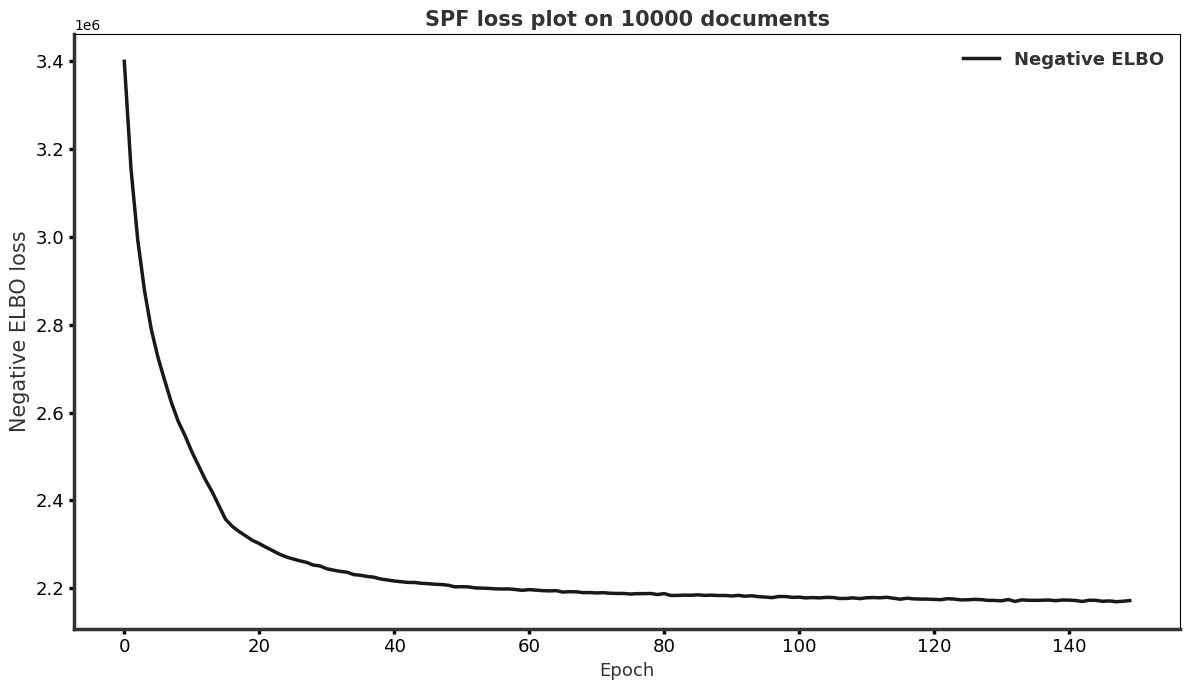

In [6]:
# See model results
spf1.plot_model_loss(neg_elbo = True)

In [6]:
betas = spf1.calculate_topic_word_distributions()
betas

,pet supplies,toys games,beauty,baby products,health personal care,grocery gourmet food
00,0.283285,0.046283,0.020027,0.013389,1.260957,0.207068
000,0.121833,0.054055,0.016228,0.081504,0.021061,0.205926
02,0.008621,0.015197,0.010666,0.059514,0.010878,0.010959
03,0.014259,0.008364,0.031277,0.009620,0.024711,0.012150
04,0.011468,0.008093,0.022056,0.061288,0.029705,0.012130
...,...,...,...,...,...,...
zoo,0.013143,0.019721,0.008872,0.074383,0.010729,0.008793
zoom,0.012547,0.059916,0.008610,0.012475,0.010089,0.009307
zords,0.009659,0.041313,0.007225,0.009382,0.008703,0.010896
zucchini,0.013095,0.007356,0.010128,0.008497,0.006571,0.043416


In [8]:
# Print the words with the highest mean intensity per topic
import pprint
pprint.pprint(spf1.print_topics(num_words = 50))

{'baby products': ['baby',
                   'use',
                   'just',
                   'great',
                   'easy',
                   'seat',
                   'little',
                   'love',
                   'old',
                   'son',
                   'bought',
                   'months',
                   'like',
                   'time',
                   'daughter',
                   'used',
                   'really',
                   'car',
                   'don',
                   'fit',
                   'sleep',
                   'diaper',
                   'bottles',
                   'night',
                   'pump',
                   'using',
                   'recommend',
                   'diapers',
                   'bed',
                   'need',
                   'stroller',
                   'bag',
                   'does',
                   'comfortable',
                   'size',
                   'goo

In [9]:
# Calculate model accuracy
categories, E_theta = spf1.calculate_topics()
df1["SPF_estimates"] = categories
df1["Accuracy"] = df1.Cat1 == df1.SPF_estimates

from sklearn.metrics import classification_report, confusion_matrix
import pprint
pprint.pprint(classification_report(df1.Cat1, df1.SPF_estimates))


('                      precision    recall  f1-score   support\n'
 '\n'
 '       baby products       0.70      0.77      0.73      1501\n'
 '              beauty       0.66      0.76      0.71      1374\n'
 'grocery gourmet food       0.62      0.89      0.73       855\n'
 'health personal care       0.61      0.46      0.52      2314\n'
 '        pet supplies       0.71      0.76      0.73      1253\n'
 '          toys games       0.91      0.81      0.86      2703\n'
 '\n'
 '            accuracy                           0.72     10000\n'
 '           macro avg       0.70      0.74      0.71     10000\n'
 '        weighted avg       0.72      0.72      0.71     10000\n')


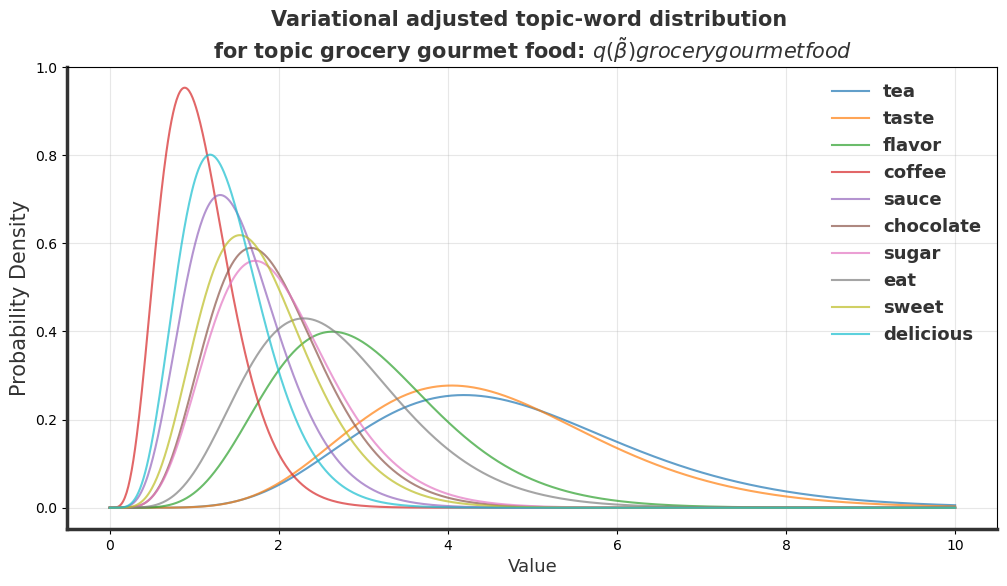

In [10]:
# Analyze keywords from topics
spf1.plot_seeded_topic_distribution(topic = "grocery gourmet food")

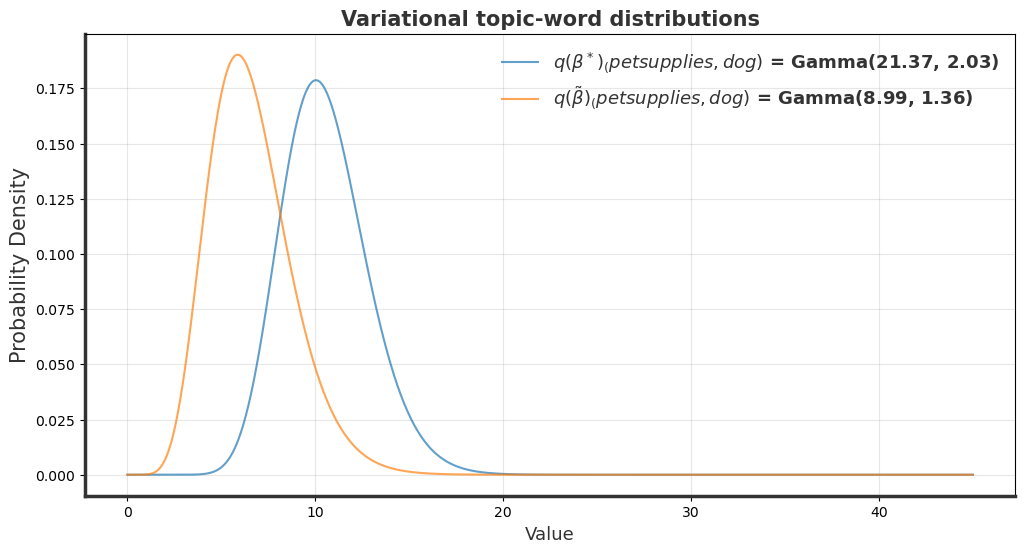

In [12]:
# Analyze topic-word distribution of specific words or keywords
spf1.plot_word_distribution(word = "dog", topic = "pet supplies", x_max = 45)